# 01_part1_linreg_1feature.ipynb
## Regresión lineal simple para luminosidad estelar

En este notebook se modela la luminosidad estelar (L) como una función de la masa estelar (M).
El objetivo es implementar regresión lineal desde primeros principios y analizar sus limitaciones físicas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

### Dataset
M representa la masa estelar en unidades de masa solar.
L representa la luminosidad estelar en unidades de luminosidad solar.

In [2]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

### Visualización del dataset
Se grafica la luminosidad en función de la masa.
La relación observada no es estrictamente lineal, lo cual anticipa limitaciones del modelo.

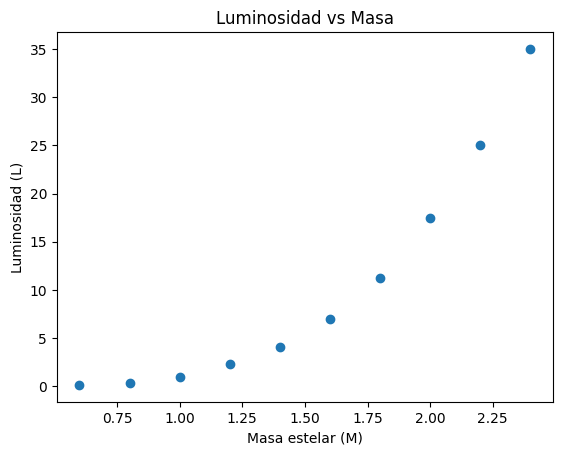

In [3]:
plt.scatter(M, L)
plt.xlabel('Masa estelar (M)')
plt.ylabel('Luminosidad (L)')
plt.title('Luminosidad vs Masa')
plt.show()

### Modelo y función de costo
Se utiliza el modelo lineal:
L_hat = w·M + b

El error se mide mediante el error cuadrático medio (MSE).

In [4]:
def predict(M, w, b):
    return w * M + b

def mse_loss(y, y_hat):
    return np.mean((y - y_hat)**2)

### Superficie de costo J(w,b)
Se evalúa la función de costo sobre una grilla de valores de w y b.
El mínimo representa los parámetros que mejor ajustan el modelo lineal a los datos.

In [5]:
w_vals = np.linspace(-5, 10, 200)
b_vals = np.linspace(-10, 10, 200)
W, B = np.meshgrid(w_vals, b_vals)
J = np.zeros_like(W)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J[i, j] = mse_loss(L, predict(M, W[i, j], B[i, j]))

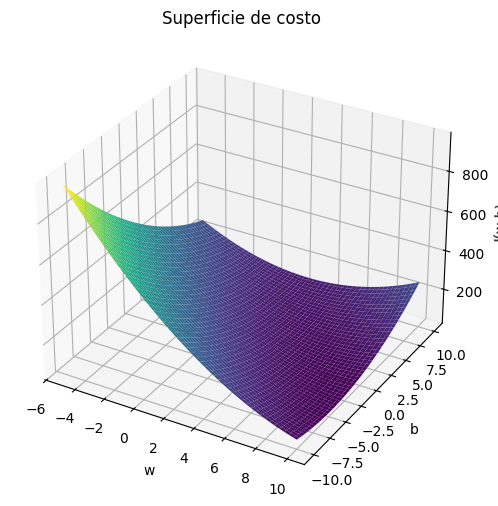

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')
ax.set_title('Superficie de costo')
plt.show()



### Gradientes
Se derivan analíticamente las derivadas parciales del costo respecto a w y b
y se implementan tanto de forma explícita como vectorizada.

In [7]:
def gradients_loop(M, L, w, b):
    N = len(M)
    dw, db = 0.0, 0.0
    for i in range(N):
        err = (w*M[i] + b) - L[i]
        dw += err * M[i]
        db += err
    return (2/N)*dw, (2/N)*db

def gradients_vectorized(M, L, w, b):
    N = len(M)
    error = (w*M + b) - L
    dw = (2/N) * np.sum(error * M)
    db = (2/N) * np.sum(error)
    return dw, db

### Descenso por gradiente y convergencia
Se prueba el algoritmo con diferentes tasas de aprendizaje.

In [8]:
def train(M, L, lr, epochs=1000):
    w, b = 0.0, 0.0
    losses = []
    for _ in range(epochs):
        dw, db = gradients_vectorized(M, L, w, b)
        w -= lr * dw
        b -= lr * db
        losses.append(mse_loss(L, predict(M, w, b)))
    return w, b, losses

In [9]:
for lr in [0.001, 0.01, 0.05]:
    w, b, losses = train(M, L, lr)
    print(f'lr={lr}: w={w:.3f}, b={b:.3f}, loss={losses[-1]:.3f}')

lr=0.001: w=7.956, b=0.009, loss=56.257
lr=0.01: w=16.284, b=-13.776, loss=20.799
lr=0.05: w=18.129, b=-16.834, loss=19.590


### Ajuste final y discusión
El modelo lineal captura la tendencia general, pero presenta errores sistemáticos.
Astrofísicamente, w representa la tasa de aumento de luminosidad con la masa,
pero una relación puramente lineal es insuficiente para describir estrellas reales.